# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [4]:
df = pd.read_csv('January_flight_data.csv')
df

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,month,day,arr_delay
0,56,B6,12264,10721,413,12264-10721,1,26,-8.0
1,57,B6,10721,12264,413,10721-12264,1,26,-32.0
2,61,B6,10721,14843,1674,10721-14843,1,26,-20.0
3,62,B6,14027,12953,1035,14027-12953,1,26,-18.0
4,65,B6,12478,10140,1826,12478-10140,1,26,-11.0
...,...,...,...,...,...,...,...,...,...
1239863,51,B6,10721,13204,1121,10721-13204,1,26,-22.0
1239864,52,B6,13204,10721,1121,13204-10721,1,26,-3.0
1239865,53,B6,12478,14027,1028,12478-14027,1,26,-22.0
1239866,54,B6,14027,12478,1028,14027-12478,1,26,-18.0


In [5]:
# drop rows with missing values
df.dropna(inplace=True)

In [6]:
df.shape

(1217645, 9)

In [7]:
df['route'].value_counts()

14771-12892    3015
12892-14771    3013
13930-12953    2317
12953-13930    2306
12892-12889    2196
               ... 
14761-16133       1
16133-14761       1
12889-11122       1
11122-12889       1
12278-11267       1
Name: route, Length: 5907, dtype: int64

In [8]:
df['op_carrier_fl_num'].value_counts()

478     606
403     585
195     583
425     566
665     560
       ... 
6624      1
6829      1
6715      1
6388      1
9301      1
Name: op_carrier_fl_num, Length: 7079, dtype: int64

In [9]:
df['op_unique_carrier'].value_counts()

WN    214258
AA    147368
DL    143003
OO    122315
UA     90531
YX     48487
B6     46725
MQ     45297
OH     42971
9E     36743
AS     35328
YV     33161
EV     31324
NK     28808
F9     18997
QX     18526
CP     15491
PT     15425
ZW     15231
G7     14207
G4     13424
HA     13390
AX     12835
C5      6677
VX      5715
EM       720
KS       348
9K       340
Name: op_unique_carrier, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
le = LabelEncoder()

# fit and transform the data
df['op_unique_carrier'] = le.fit_transform(df['op_unique_carrier'])
df['route'] = le.fit_transform(df['route'])
df['route'].value_counts()

5276    3015
3018    3013
4072    2317
3120    2306
2981    2196
        ... 
5237       1
5905       1
2847       1
1108       1
2577       1
Name: route, Length: 5907, dtype: int64

In [11]:
X = df.drop(['month','arr_delay'], axis=1)
y = df['arr_delay']

                   op_carrier_fl_num  op_unique_carrier  origin_airport_id  \
op_carrier_fl_num           1.000000           0.246099          -0.028585   
op_unique_carrier           0.246099           1.000000           0.043598   
origin_airport_id          -0.028585           0.043598           1.000000   
dest_airport_id            -0.035986           0.043771           0.020916   
distance                   -0.356135          -0.151063           0.071430   
route                      -0.025271           0.041639           0.996353   
day                        -0.008833          -0.009033          -0.006290   

                   dest_airport_id  distance     route       day  
op_carrier_fl_num        -0.035986 -0.356135 -0.025271 -0.008833  
op_unique_carrier         0.043771 -0.151063  0.041639 -0.009033  
origin_airport_id         0.020916  0.071430  0.996353 -0.006290  
dest_airport_id           1.000000  0.071344  0.034985 -0.006057  
distance                  0.071344  1.00

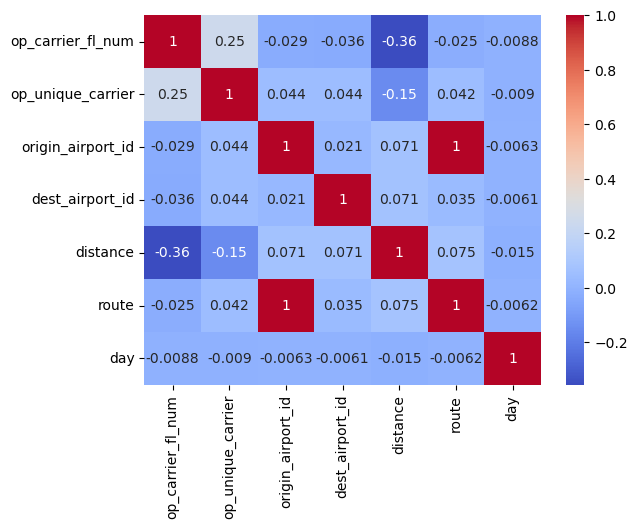

In [12]:
# Assuming your independent variables are stored in a pandas DataFrame called X
corr_matrix = X.corr()

# Print the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)

In [14]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# evaluate the model on the testing dataset
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2598.292693517108


In [17]:
from scipy import stats

In [18]:
r_sq = lr_model.score(X_train, y_train)
r_sq

0.00442542396874368

In [19]:
from sklearn.feature_selection import f_regression

# Get the number of features in the model
n_features = X_train.shape[1]
n_features

7

In [20]:
# Calculate the adjusted R-squared value
n_samples = X_train.shape[0]
adj_r_sq = 1 - (1 - r_sq) * (n_samples - 1) / (n_samples - n_features - 1)
adj_r_sq

0.004418269708608036

In [21]:
# Calculate the F-statistic and corresponding p-values for each feature
f_stats, p_values = f_regression(X_train, y_train)

f_stats

array([2.53771625e+03, 1.72240887e+00, 7.88111543e+00, 5.49086435e-01,
       1.53553668e+03, 8.31658518e+00, 9.71897488e+02])

In [22]:
X.columns.tolist()

['op_carrier_fl_num',
 'op_unique_carrier',
 'origin_airport_id',
 'dest_airport_id',
 'distance',
 'route',
 'day']

In [23]:
p_values

array([0.00000000e+000, 1.89383574e-001, 4.99546526e-003, 4.58691395e-001,
       0.00000000e+000, 3.92855648e-003, 2.93937403e-213])

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
y = y[0:5000]

In [26]:
X = df.drop(['op_carrier_fl_num', 'op_unique_carrier', 'dest_airport_id'], axis=1)[0:5000]
X

,origin_airport_id,distance,route,month,day,arr_delay
0,12264,413,2388,1,26,-8.0
1,10721,413,597,1,26,-32.0
2,10721,1674,631,1,26,-20.0
3,14027,1035,4203,1,26,-18.0
4,12478,1826,2714,1,26,-11.0
...,...,...,...,...,...,...
4999,11433,500,1710,1,26,-24.0
5000,14869,689,5495,1,26,-9.0
5001,13487,622,3672,1,26,-20.0
5002,11433,235,1761,1,26,12.0


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)

In [28]:
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Fit the classifier to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict the labels of the test data
y_pred = rfc.predict(X_test)

In [31]:
# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

       -56.0       0.00      0.00      0.00         1
       -47.0       0.00      0.00      0.00         1
       -46.0       0.00      0.00      0.00         1
       -45.0       0.00      0.00      0.00         0
       -44.0       0.00      0.00      0.00         2
       -43.0       0.00      0.00      0.00         1
       -42.0       0.00      0.00      0.00         1
       -41.0       0.00      0.00      0.00         2
       -40.0       0.00      0.00      0.00         2
       -39.0       0.00      0.00      0.00         3
       -38.0       0.00      0.00      0.00         3
       -37.0       0.00      0.00      0.00         3
       -36.0       0.50      0.17      0.25         6
       -35.0       0.00      0.00      0.00         3
       -34.0       0.00      0.00      0.00         3
       -33.0       0.33      0.11      0.17         9
       -32.0       0.00      0.00      0.00

C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_cla

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.